In [24]:
from graphdriver.commons import results, setup
from graphdriver.utils import paths
import pandas as pd
from collections import defaultdict

In [25]:
def ranking_standardize_df(df, column_name: str):
    df.loc["mean"] = df.mean()
    df = df.applymap("{0:.3f}".format)
    df[column_name] = df["mean"] + "$\pm$" + df["std"]
    df = df[[column_name]]
    df.index = "\textbf{" + df.index.str.upper() + "}"
    return df

In [26]:
dfs = []
for nt in list(reversed(setup.network_types()))[1:]:
    scores_dict = defaultdict()
    for cancer in setup.cancer_types():
        score, std = results.load_results(cancer, nt).score_test_pr_auc()
        scores_dict[cancer] = {"mean": score, "std": std}
        df = pd.DataFrame(scores_dict).T
        df = ranking_standardize_df(df, '_'.join(nt))
    dfs.append(df)

df = pd.concat(dfs, axis=1)

In [27]:
# add deepdriver
df_deep = paths.pd_load(path=paths.results_deepdriver() + "results_summary")
df_deep.loc["mean"] = df_deep.mean()
df_deep = df_deep.applymap("{0:.3f}".format)
df_deep["column_name"] = df_deep["deepdriver_mean"] + "$\pm$" + df_deep["deepdriver_std"]
df["DeepDriver"] = df_deep["column_name"].to_list()

In [28]:
# add emogi
emogi = ['--' for _ in range(14)]
emogi[1] = '0.59*'
emogi[-3] = '0.27*'
df["Emogi"] = emogi

In [29]:
path = 'results_main.tex'
# df.to_latex(path, escape=False)

# Make bar charts

In [30]:
from sklearn import metrics
import numpy as np

def ranking_standardize_df(df, column_name: str):
    if column_name == 'genes_ppi':
        column_name = 'MGNNdriver'
    elif column_name == 'genes':
        column_name = 'a)'
    elif column_name == 'ppi':
        column_name = 'b)'
    df.loc["Mean"] = df.mean()
    # df = df.applymap("{0:.3f}".format)
    df[column_name] = df["Mean"]
    df = df[[column_name]]
    return df

def score_test_pr_auc(res):
    y_true, y_pred = res._cat_results_test()
    scores = []
    for true, pred in zip(y_true, y_pred):
        if pred.sum() == 0:
            return 0, 1
        precision, recall, _thresholds = metrics.precision_recall_curve(true, pred)
        scores.append(metrics.auc(recall, precision))
    return np.mean(scores), np.std(scores)

dfs = []
for nt in list(reversed(setup.network_types()))[1:]:
    scores_dict = defaultdict()
    for cancer in setup.cancer_types():
        score, std = score_test_pr_auc(results.load_results(cancer, nt))
        scores_dict[cancer] = {"Mean": score, "std": std}
        df = pd.DataFrame(scores_dict).T
        df = ranking_standardize_df(df, '_'.join(nt))
    dfs.append(df)

df = pd.concat(dfs, axis=1)
# add deepdriver
df_deep = paths.pd_load(path=paths.results_deepdriver() + "results_summary")
df_deep.loc["Mean"] = df_deep.mean()
# df_deep = df_deep.applymap("{0:.3f}".format)
df_deep["column_name"] = df_deep["deepdriver_mean"]
df["DeepDriver"] = df_deep["column_name"].to_list()
# add emogi
# emogi = ['--' for _ in range(14)]
emogi = [0 for _ in range(14)]
emogi[1] = 0.59
emogi[-3] = 0.27
df["Emogi"] = emogi
df

,MGNNdriver,a),b),DeepDriver,Emogi
blca,0.603776,0.355003,0.510898,0.215353,0.00
brca,0.578261,0.167803,0.506182,0.158862,0.59
cesc,0.627023,0.321643,0.531812,0.073726,0.00
coad,0.495652,0.211272,0.407828,0.125732,0.00
esca,0.354783,0.121739,0.401326,0.050544,0.00
hnsc,0.496405,0.180479,0.441310,0.110631,0.00
lihc,0.578736,0.206219,0.568689,0.041246,0.00
luad,0.430117,0.294076,0.349638,0.052078,0.00
lusc,0.443113,0.131740,0.337902,0.057352,0.00
prad,0.348323,0.111462,0.375919,0.050374,0.00


In [31]:
(0.418670 + 0.578261)/2

0.4984655

In [32]:
df['MGNNdriver'].sort_values()

prad    0.348323
esca    0.354783
thca    0.418670
luad    0.430117
lusc    0.443113
stad    0.446272
Mean    0.493627
coad    0.495652
hnsc    0.496405
brca    0.578261
lihc    0.578736
ucec    0.596021
blca    0.603776
cesc    0.627023
Name: MGNNdriver, dtype: float64

In [33]:
# df.to_excel('results-main-excel.xlsx')

4


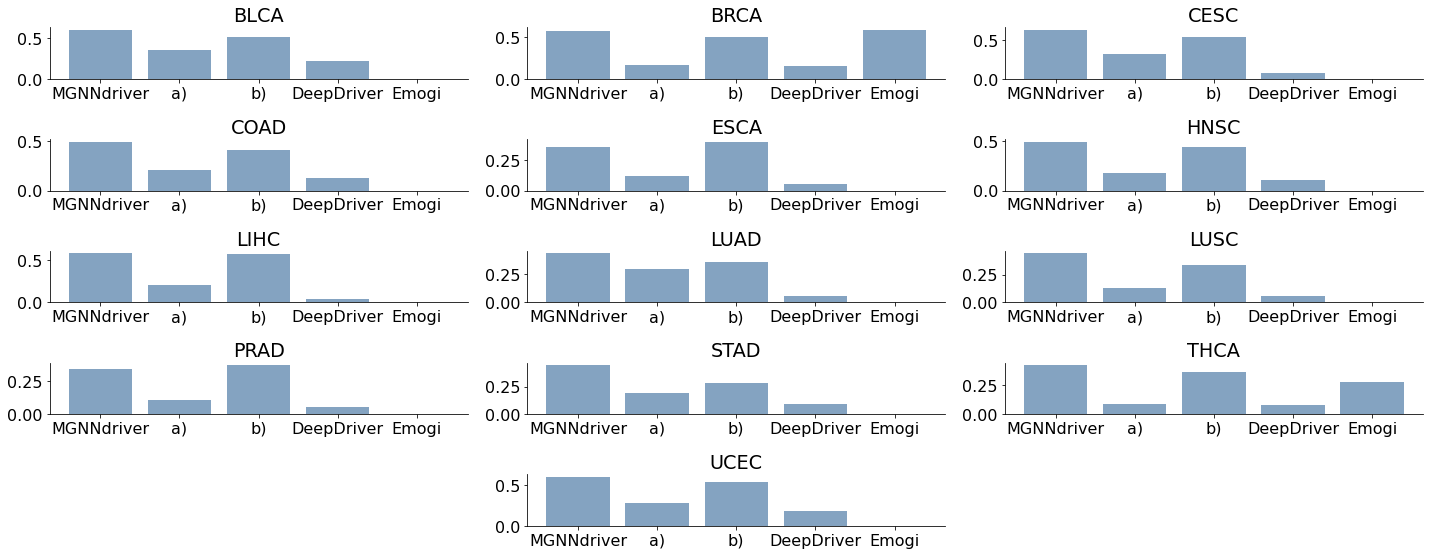

In [34]:
import matplotlib.pyplot as plt

plt.rc('font', size=16) 
n_rows = 5
n_cols =3
total = 12
curr_row = 0

fig, axs = plt.subplots(n_rows,n_cols,figsize=(20,8))
for i in range(n_cols*n_rows):
    if i  == 14:
        axs[curr_row,i%n_cols].set_visible(False)
        continue
    d = df.index[i]
    if i  == 12:
        # fig.delaxes(axs[curr_row,i%n_cols])
        axs[curr_row,i%n_cols].set_visible(False)
        continue
    if i == 13:
        print(curr_row)
        d = df.index[i-1]
        ax = axs[curr_row,i%n_cols]        
    elif i>n_cols*4-1:
        print(d)
        ax = axs[curr_row,i%n_cols]
        if i % n_cols == n_cols-1:
            curr_row+=1
    elif i>n_cols*3-1:
        ax = axs[curr_row,i%n_cols]
        if i % n_cols == n_cols-1:
            curr_row+=1
    elif i>n_cols*2-1:
        ax = axs[curr_row,i%n_cols]
        if i % n_cols == n_cols-1:
            curr_row+=1
    elif i>n_cols-1:
        ax = axs[curr_row,i%n_cols]
        if i % n_cols == n_cols-1:
            curr_row+=1
    else:
        ax = axs[curr_row,i%n_cols]
        if i % n_cols == n_cols-1:
            curr_row+=1
    color=[(0.2, 0.4, 0.6, 0.6) for i in range(5)]
    # if d in ['blca', 'cesc', 'ucec']: color[0] = (0.2, 0.2, 0.6, 0.6)
    ax.bar(df.T[d].index.to_numpy(),df.T[d].to_numpy(), color=color)
    ax.set_title(d.upper())
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
        
txt="a) MGNNdriver using only the healthy graph. b) MGNNdriver using only the diseased graph."
# plt.figtext(0.5, 0.005, txt, wrap=True, horizontalalignment='center', fontsize=12)
fig.tight_layout()
fig.savefig('results-main-bar-charts-all.png')
plt.show()
plt.close()



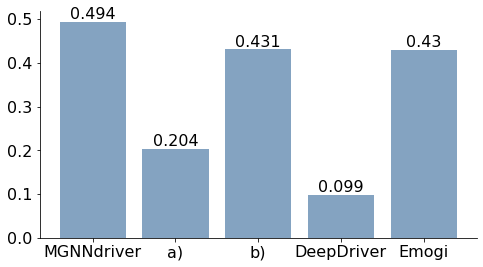

In [35]:
fig, ax = plt.subplots(figsize=(7,4))
plt.rc('font', size=16) 
d = "Mean"
mean = df.T[d].to_numpy()
mean[-1] = 0.43
p = ax.bar(df.T[d].index.to_numpy(),df.T[d].to_numpy(), color=(0.2, 0.4, 0.6, 0.6))
ax.bar_label(p, df.T[d].round(3).to_list())
# for i,v in enumerate(df.T[d].round(3)):
#     ax.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
    # plt.text(v + 3, i + .25, str(v), color=(0.2, 0.4, 0.6, 0.9), fontweight='bold')
# ax.set_title('Mean')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
txt="a) MGNNdriver using only the healthy graph. b) MGNNdriver using only\n the diseased graph."
# plt.figtext(0.5, -0.04, txt, wrap=True, horizontalalignment='center', fontsize=12)
fig.tight_layout()
fig.savefig('results-main-bar-charts-mean.png',bbox_inches='tight')
plt.show()
plt.close()

In [36]:
(0.59 + 0.27 )/2

0.43

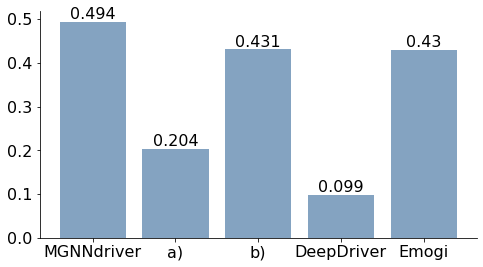

In [37]:
fig, ax = plt.subplots(figsize=(7,4))
plt.rc('font', size=16) 
d = "Mean"
mean = df.T[d].to_numpy()
mean[-1] = 0.43
p = ax.bar(df.T[d].index.to_numpy(),df.T[d].to_numpy(), color=(0.2, 0.4, 0.6, 0.6))
ax.bar_label(p, df.T[d].round(3).to_list())
# for i,v in enumerate(df.T[d].round(3)):
#     ax.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
    # plt.text(v + 3, i + .25, str(v), color=(0.2, 0.4, 0.6, 0.9), fontweight='bold')
# ax.set_title('Mean')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
txt="a) MGNNdriver using only the healthy graph. b) MGNNdriver using only\n the diseased graph."
# plt.figtext(0.5, -0.04, txt, wrap=True, horizontalalignment='center', fontsize=12)
fig.tight_layout()
fig.savefig('results-main-bar-charts-mean.png',bbox_inches='tight')
plt.show()
plt.close()

In [80]:
rund = 2
cancers = df.index.str.upper().to_list()
cancers
cancers[-1] = 'Mean'
graphdriver = df['MGNNdriver'].round(rund).to_list()
graphdriver
a = df['a)'].round(rund).to_list()
a
b = df['b)'].round(rund).to_list()
b
deepdriver = df['DeepDriver'].round(rund).to_list()
deepdriver
emogi = df['Emogi'].round(rund).to_list()
emogi


[0.0, 0.59, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.27, 0.0, 0.43]

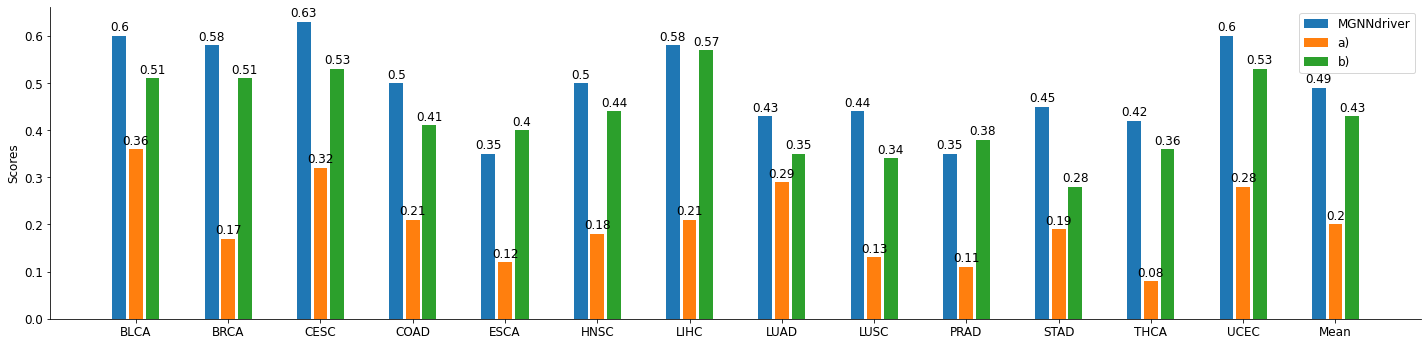

In [94]:
import matplotlib.pyplot as plt
import numpy as np


plt.rc('font', size=12) 

labels = cancers

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width *1.2, graphdriver, width, label='MGNNdriver')
rects2 = ax.bar(x, a, width, label='a)')
rects3 = ax.bar(x + width *1.2, b, width, label='b)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
# ax.set_title('Our methods', fontsize=16)
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
ax.bar_label(rects3, padding=2)

fig.tight_layout()
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


fig.savefig("./results_main_bar_combined_our.png")
plt.show()
plt.close()

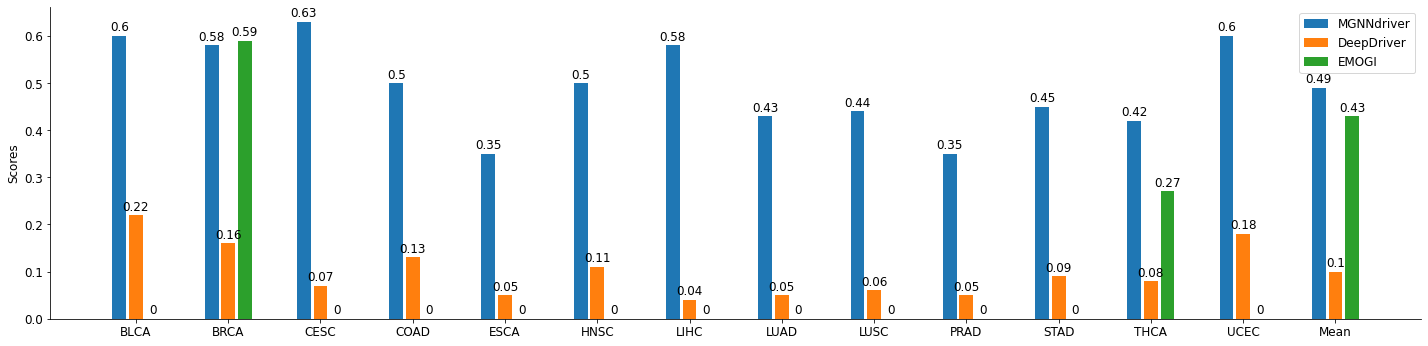

In [95]:
import matplotlib.pyplot as plt
import numpy as np


plt.rc('font', size=12) 

labels = cancers

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width *1.2, graphdriver, width, label='MGNNdriver')
rects2 = ax.bar(x, deepdriver, width, label='DeepDriver')
rects3 = ax.bar(x + width *1.2, emogi, width, label='EMOGI')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
# ax.set_title('Comparison methods', fontsize=16)
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
ax.bar_label(rects3, padding=2)

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()

fig.savefig("./results_main_bar_combined_others.png")
plt.show()
plt.close()